In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(1234)

# Fraud Score Visualizations and Final Score Computation

In [45]:
results_df = pd.merge(pc_to_keep_z, enc.drop(['PC1', 'PC2', 'PC3', 'PC4'],axis=1),
                      left_index=True, right_index=True)

In [46]:
results_df['FINAL_SCORE'] = (results_df['SUM'] + results_df['REP_ERROR']) / 2

In [68]:
results_df.sort_values('FINAL_SCORE')

,PC1,PC2,PC3,PC4,SUM,REP_ERROR,FINAL_SCORE
526472,-0.000733,0.002476,0.002799,-0.001892,0.004253,0.004981,0.004617
878367,-0.003433,-0.002527,0.000428,-0.001325,0.004485,0.005638,0.005062
947642,-0.002586,0.000897,0.001408,-0.002841,0.004188,0.006020,0.005104
290965,0.003155,-0.003250,-0.002125,-0.002606,0.005641,0.004822,0.005232
309111,-0.002068,-0.003422,-0.000931,-0.003094,0.005141,0.005358,0.005250
...,...,...,...,...,...,...,...
750815,100.938732,430.425074,140.230377,75.246884,469.873413,153.922861,311.898137
1067359,93.216498,425.863848,178.071855,104.286161,482.322010,171.006879,326.664445
565391,628.196721,204.355163,-321.617378,-190.571639,759.043768,395.325185,577.184476
632815,476.815783,-330.794514,749.862877,324.360216,1002.138806,581.844279,791.991542


<AxesSubplot:xlabel='FINAL_SCORE', ylabel='Density'>

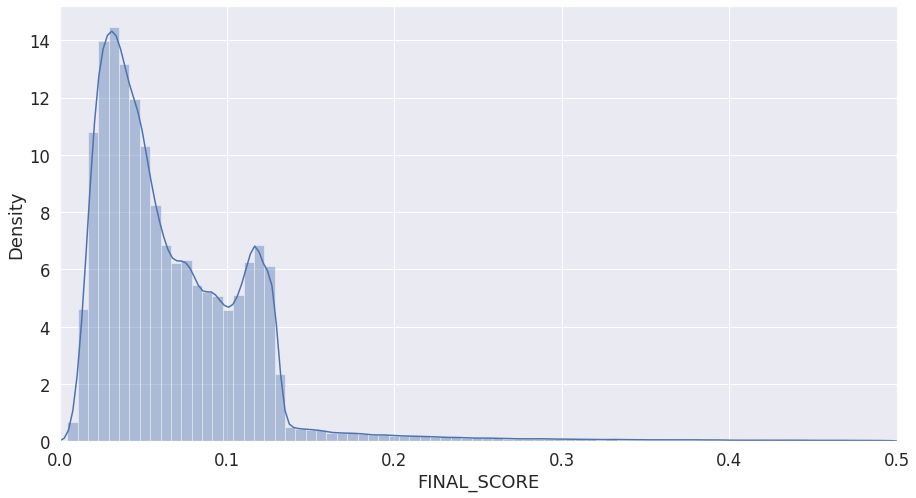

In [74]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=1.5)
xhigh = 0.5
plt.xlim(0,xhigh)
temp = results_df[(results_df['FINAL_SCORE'] <= xhigh)]
sns.distplot(temp['FINAL_SCORE'], bins = 80, kde=True)

## Binning method 1: Quantile Binning

In [53]:
results_df_sorted = results_df.sort_values('FINAL_SCORE', ascending=True)
results_df_sorted['q_bins'] = pd.qcut(results_df_sorted['FINAL_SCORE'], q=20, labels=range(1, 21))

In [54]:
results_df_sorted

,PC1,PC2,PC3,PC4,SUM,REP_ERROR,FINAL_SCORE,q_bins
526472,-0.000733,0.002476,0.002799,-0.001892,0.004253,0.004981,0.004617,1
878367,-0.003433,-0.002527,0.000428,-0.001325,0.004485,0.005638,0.005062,1
947642,-0.002586,0.000897,0.001408,-0.002841,0.004188,0.006020,0.005104,1
290965,0.003155,-0.003250,-0.002125,-0.002606,0.005641,0.004822,0.005232,1
309111,-0.002068,-0.003422,-0.000931,-0.003094,0.005141,0.005358,0.005250,1
...,...,...,...,...,...,...,...,...
750815,100.938732,430.425074,140.230377,75.246884,469.873413,153.922861,311.898137,20
1067359,93.216498,425.863848,178.071855,104.286161,482.322010,171.006879,326.664445,20
565391,628.196721,204.355163,-321.617378,-190.571639,759.043768,395.325185,577.184476,20
632815,476.815783,-330.794514,749.862877,324.360216,1002.138806,581.844279,791.991542,20
